<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/Colab/Kai/dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import networkx as nx

In [2]:
def draw_edge(t,c):
    nx.draw_networkx_edges(G, pos, edgelist=[t], edge_color=c)

In [3]:
def path_gen(G, sp, ep):
  d = {n: float('inf') for n in G.nodes()}
  d[sp] = 0
  prev = {}
  unvisited = set(G.nodes())
  d_out = 0

  while unvisited:
    curr_node = min(unvisited, key=lambda n: d[n])
    unvisited.remove(curr_node)
    for neighbor in G.neighbors(curr_node):
      if neighbor in unvisited:
        d_prime = d[curr_node] + G[curr_node][neighbor]['weight']
        if d_prime < d[neighbor]:
          d[neighbor] = d_prime
          prev[neighbor] = curr_node

  path = []
  curr_node = ep
  while curr_node != sp:
    path.insert(0, (prev[curr_node], curr_node))
    curr_node = prev[curr_node]

  for p in path:
    d_out += G[p[0]][p[1]]['weight']

  return path, d_out

In [4]:
np.random.seed(37)
num = 20
points = np.random.rand(num, 2)

tri = Delaunay(points)

point_weights = {i: 1024 for i in range(len(points))}

edge_weights = {}
for simplex in tri.simplices:
    for i in range(3):
        for j in range(i+1, 3):
            edge = tuple(sorted([simplex[i], simplex[j]]))
            if edge not in edge_weights:
                edge_weights[edge] = (int)(np.random.rand()*2000)/100

G = nx.Graph()
for edge, weight in edge_weights.items():
    G.add_edge(edge[0], edge[1], weight=weight)

# generate the optimal path from 3 to 5
path_edges, dist = path_gen(G,0,17)

41.86


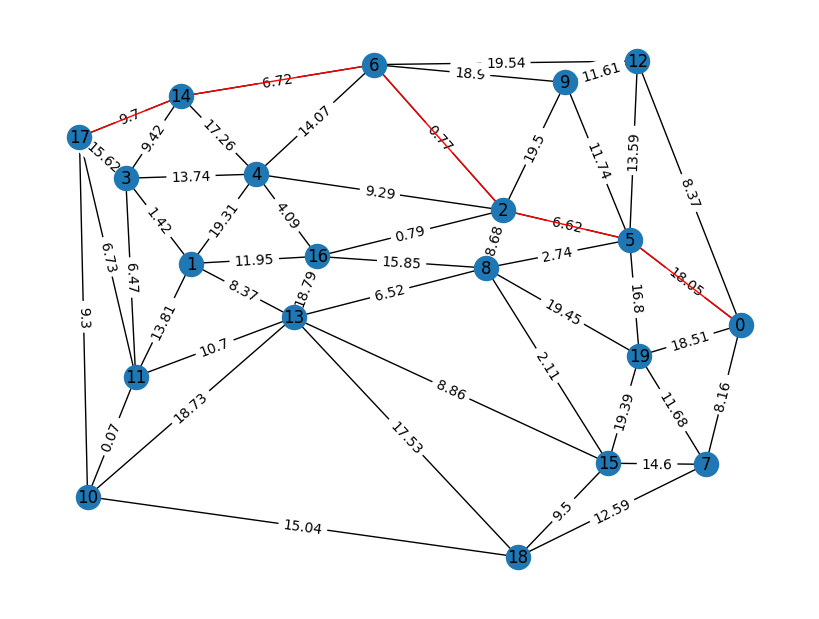

In [5]:
plt.figure(figsize=(8, 6))
pos = {i: points[i] for i in range(len(points))}
nx.draw(G, pos, with_labels=True, node_size=300)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
for e in path_edges:
  draw_edge(e,'red')
print(dist)
plt.show()